# Project 2: Sales Performance Analysis (Task-2)

## Objective:
Analyze sales data to identify trends, relationships, and factors affecting sales performance using
Exploratory Data Analysis (EDA) and a Linear Regression model.

# Step 1: Import Required Libraries


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load The Cleaned Dataset

In [16]:
df = pd.read_csv(r"E:\BE\Sem 8\Virtual Internship\Tasks\Task-2\Dataset\sales_data_cleaned.csv")
# Displays first 5 rows of the dataframe
df.head()


,Category,City,Country,Customer ID,Customer Name,Discount,Market,Order Date,Order ID,Order Priority,...,Sales,Segment,Ship Date,Ship Mode,Shipping Cost,State,Sub-Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,00:00.0,CA-2011-130813,High,...,19,Consumer,00:00.0,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,00:00.0,CA-2011-148614,Medium,...,19,Consumer,00:00.0,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,00:00.0,CA-2011-118962,Medium,...,21,Consumer,00:00.0,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,00:00.0,CA-2011-118962,Medium,...,111,Consumer,00:00.0,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,00:00.0,CA-2011-146969,High,...,6,Consumer,00:00.0,Standard Class,1.32,California,Paper,2011,North America,40


# Step 3: Dataset Overview
- Checks rows, columns, and data types

In [17]:
print("Shape of dataset:", df.shape)
df.info()
print("Dataset Data Types:")
df.dtypes

Shape of dataset: (45635, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45635 entries, 0 to 45634
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        45635 non-null  object 
 1   City            45635 non-null  object 
 2   Country         45635 non-null  object 
 3   Customer ID     45635 non-null  object 
 4   Customer Name   45635 non-null  object 
 5   Discount        45635 non-null  float64
 6   Market          45635 non-null  object 
 7   Order Date      45635 non-null  object 
 8   Order ID        45635 non-null  object 
 9   Order Priority  45635 non-null  object 
 10  Product ID      45635 non-null  object 
 11  Product Name    45635 non-null  object 
 12  Profit          45635 non-null  float64
 13  Quantity        45635 non-null  int64  
 14  Region          45635 non-null  object 
 15  Row ID          45635 non-null  int64  
 16  Sales           45635 non-null  int64  
 17  S

Category           object
City               object
Country            object
Customer ID        object
Customer Name      object
Discount          float64
Market             object
Order Date         object
Order ID           object
Order Priority     object
Product ID         object
Product Name       object
Profit            float64
Quantity            int64
Region             object
Row ID              int64
Sales               int64
Segment            object
Ship Date          object
Ship Mode          object
Shipping Cost     float64
State              object
Sub-Category       object
Year                int64
Market2            object
weeknum             int64
dtype: object

# Step 4: Check Missing Values
- Identifies columns with missing data

In [18]:
df.isnull().sum()

Category          0
City              0
Country           0
Customer ID       0
Customer Name     0
Discount          0
Market            0
Order Date        0
Order ID          0
Order Priority    0
Product ID        0
Product Name      0
Profit            0
Quantity          0
Region            0
Row ID            0
Sales             0
Segment           0
Ship Date         0
Ship Mode         0
Shipping Cost     0
State             0
Sub-Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

# Step 5: Statistical Summary
- Mean, median, std deviation, min, max

In [19]:
df.describe()

,Discount,Profit,Quantity,Row ID,Sales,Shipping Cost,Year,weeknum
count,45635.000000,45635.000000,45635.000000,45635.000000,45635.000000,45635.000000,45635.000000,45635.000000
mean,0.148033,10.191308,3.263789,25880.867624,121.667580,13.255251,2012.779796,31.246653
std,0.218058,64.842801,2.155229,14992.542863,131.533837,18.916832,1.098096,14.426964
min,0.000000,-1924.542000,1.000000,1.000000,0.000000,0.002000,2011.000000,1.000000
25%,0.000000,-0.013200,2.000000,12689.500000,27.000000,2.277000,2012.000000,20.000000
50%,0.000000,7.703100,3.000000,26109.000000,67.000000,6.250000,2013.000000,33.000000
75%,0.200000,26.661600,4.000000,39056.500000,169.000000,16.410000,2014.000000,44.000000
max,0.850000,284.220000,14.000000,51290.000000,581.000000,246.050000,2014.000000,53.000000


# Step 7: Remove Duplicate Records

In [20]:
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (45635, 26)


# Step 8: Handle Missing Values
- Mean/Median for numeric, placeholder for categorical

In [21]:
# Numerical columns
df['Sales'].fillna(df['Sales'].mean(), inplace=False)
df['Profit'].fillna(df['Profit'].mean(), inplace=False)
df['Discount'].fillna(df['Discount'].median(), inplace=False)

# Categorical columns
df['Region'].fillna("Unknown", inplace=False)
df['Category'].fillna("Unknown", inplace=False)
print("\nData cleaning completed.")


Data cleaning completed.


# Step 9: Convert Date Column to DateTime Column
- Required for trend analysis or time-series analysis

In [22]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df.dtypes

Category                  object
City                      object
Country                   object
Customer ID               object
Customer Name             object
Discount                 float64
Market                    object
Order Date        datetime64[ns]
Order ID                  object
Order Priority            object
Product ID                object
Product Name              object
Profit                   float64
Quantity                   int64
Region                    object
Row ID                     int64
Sales                      int64
Segment                   object
Ship Date         datetime64[ns]
Ship Mode                 object
Shipping Cost            float64
State                     object
Sub-Category              object
Year                       int64
Market2                   object
weeknum                    int64
dtype: object

# Step 10: Sales Trend Over Time (Time Series Graphs)
- Shows growth / decline pattern

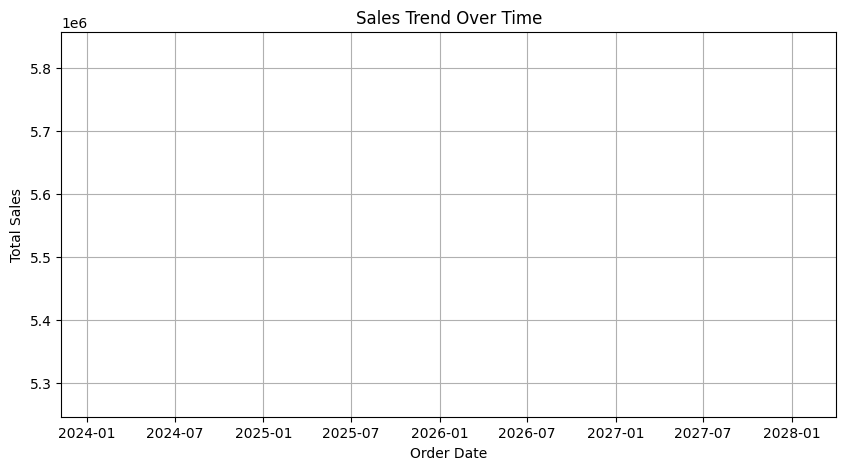

In [25]:
sales_over_time = df.groupby('Order Date')['Sales'].sum()

plt.figure(figsize=(10,5))
plt.plot(sales_over_time)
plt.title("Sales Trend Over Time")
plt.xlabel("Order Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

# Step 11: Scatter Ploat - Relationship Between Profit And Discount
- Shows how discounts affect profit

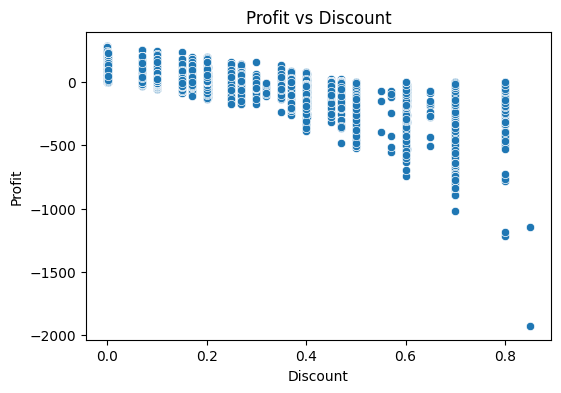

In [26]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title("Profit vs Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

# Step 12: Sales by Region (Bar Chart)
- Identifies top-performing regions

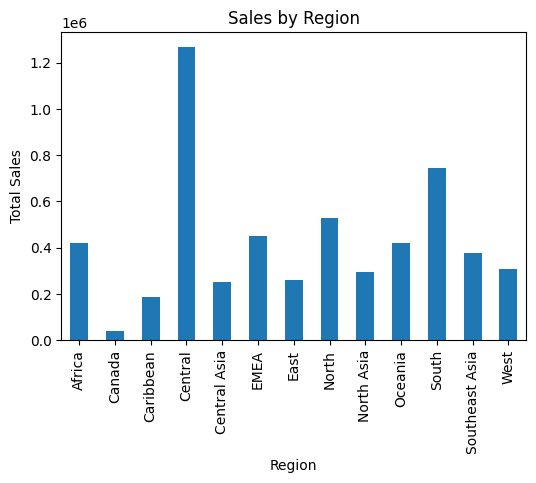

In [27]:
region_sales = df.groupby('Region')['Sales'].sum()

plt.figure(figsize=(6,4))
region_sales.plot(kind='bar')
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()

# Step 13: Sales by Category (Pie Chart)
- Shows category-wise contribution

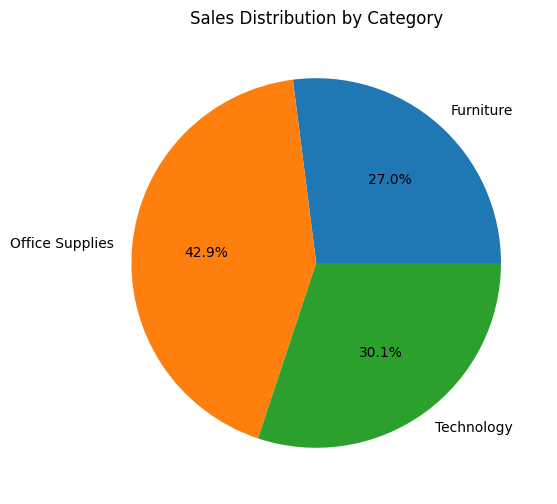

In [28]:
category_sales = df.groupby('Category')['Sales'].sum()

plt.figure(figsize=(6,6))
category_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title("Sales Distribution by Category")
plt.ylabel("")
plt.show()

# Step 14: Feature Selection for Model
- Profit & Discount → Predict Sales

In [29]:
X = df[['Profit', 'Discount']]
y = df['Sales']

# Step 15: Train-Test Split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 16: Train Linear Regression Model

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


# Step 17: Make Predictions

In [34]:
y_pred = model.predict(X_test)

# Step 18: Model Evaluation
- Evaluates prediction accuracy

In [35]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)

Mean Squared Error (MSE): 17092.890458048118
R2 Score: 0.04851742313608076


# Step 19: Insights & Recommendations

## Insights & Recommendations

- High discounts tend to reduce profit margins.
- Certain regions generate higher sales and should be prioritized.
- Technology and Office categories perform better than others.
- Sales trends show seasonal patterns useful for planning.

### Recommendations:
- Optimize discount strategies.
- Focus marketing on top-performing regions.
- Promote high-revenue product categories.
